In [28]:
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore")

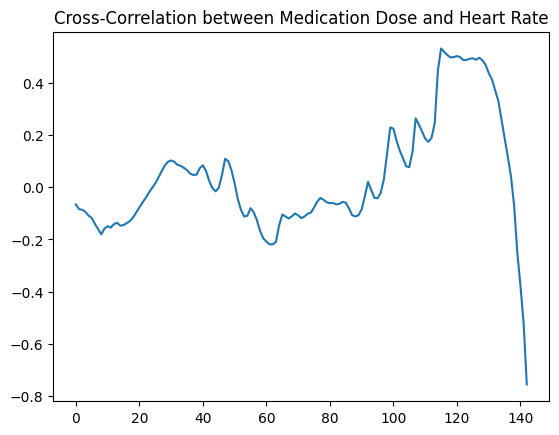

                            OLS Regression Results                            
Dep. Variable:             Fuel_Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6243
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.431
Time:                        19:03:54   Log-Likelihood:                -80.506
No. Observations:                 143   AIC:                             165.0
Df Residuals:                     141   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.2845      0.089     36.700   

In [ ]:
STORE_ID = 1
DEPT_ID = 1
data  = pd.read_csv("data/train.csv")
store = data[(data["Store"] == STORE_ID) & (data["Dept"] == DEPT_ID)]
store['Date'] = pd.to_datetime(store['Date'], format='%Y-%m-%d')
features = pd.read_csv("data/features.csv")
features['Date'] = pd.to_datetime(features['Date'], format='%Y-%m-%d')
features = features[features["Store"] == STORE_ID]
meged = pd.merge(store, features[["Date", "Fuel_Price"]], on="Date", how="left")

# Cross-correlation
cross_corr = ccf(meged['Weekly_Sales'], meged['Fuel_Price'])
plt.plot(cross_corr)
plt.title("Cross-Correlation between Medication Dose and Heart Rate")
plt.show()

# Regression
X = meged['Weekly_Sales']
y = meged['Fuel_Price']
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())


In [27]:
print(model.f_pvalue)

0.43076703400496663


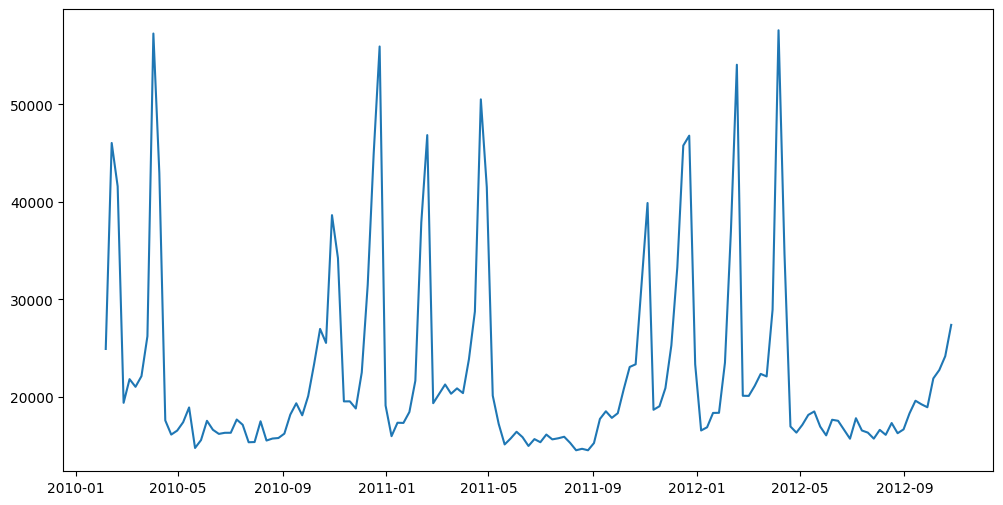

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(meged['Date'], meged['Weekly_Sales'], label='Historical Sales')

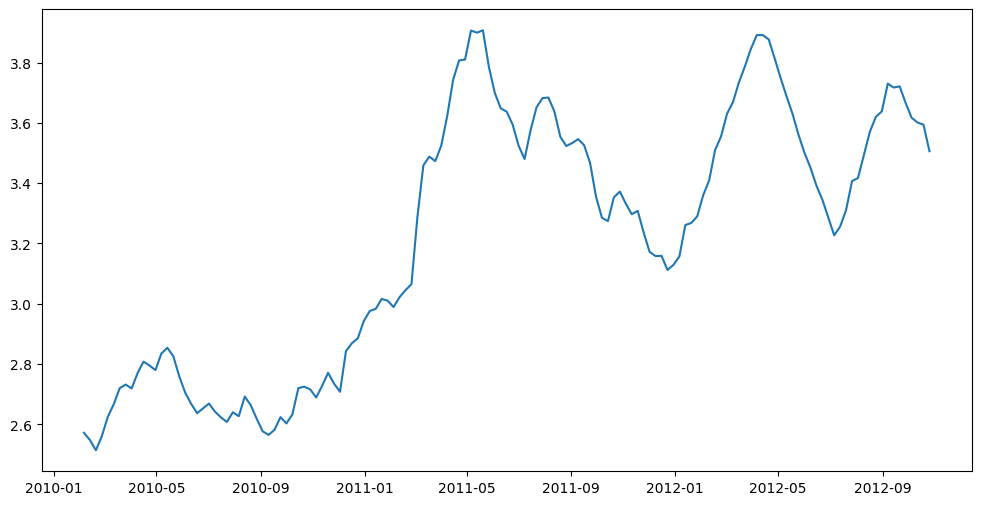

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(meged['Date'], meged['Fuel_Price'], label='Historical Sales')

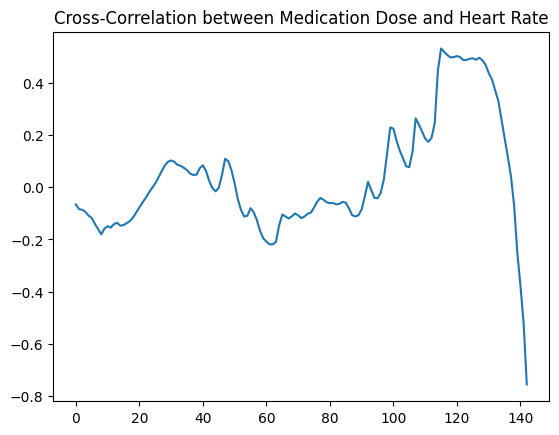

                            OLS Regression Results                            
Dep. Variable:             Fuel_Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6243
Date:                Sat, 04 Jan 2025   Prob (F-statistic):              0.431
Time:                        18:40:44   Log-Likelihood:                -80.506
No. Observations:                 143   AIC:                             165.0
Df Residuals:                     141   BIC:                             170.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.2845      0.089     36.700   

In [19]:
from statsmodels.tsa.stattools import ccf
import statsmodels.api as sm

# Cross-correlation
cross_corr = ccf(meged['Weekly_Sales'], meged['Fuel_Price'])
plt.plot(cross_corr)
plt.title("Cross-Correlation between Medication Dose and Heart Rate")
plt.show()

# Regression
X = meged['Weekly_Sales']
y = meged['Fuel_Price']
X = sm.add_constant(X)  # Add intercept
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
# Detrend the data
meged['HeartRate_detrended'] = meged['Weekly_Sales'] - meged['Weekly_Sales'].rolling(window=10, center=True).mean()
meged['RoomTemp_detrended'] = meged['Fuel_Price'] - meged['Fuel_Price'].rolling(window=10, center=True).mean()

# Re-run regression on detrended data
X_detrended = sm.add_constant(meged['RoomTemp_detrended'])
y_detrended = meged['HeartRate_detrended']

model_detrended = sm.OLS(y_detrended.dropna(), X_detrended.dropna()).fit()

# Display results
print(model_detrended.summary())

In [31]:
df = pd.DataFrame({'RoomTemp': meged['Weekly_Sales'], 'HeartRate': meged['Fuel_Price']})
grangercausalitytests(df, maxlag=20)  # Test for causation with lags


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4082  , p=0.5239  , df_denom=139, df_num=1
ssr based chi2 test:   chi2=0.4170  , p=0.5184  , df=1
likelihood ratio test: chi2=0.4164  , p=0.5187  , df=1
parameter F test:         F=0.4082  , p=0.5239  , df_denom=139, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.9498  , p=0.0557  , df_denom=136, df_num=2
ssr based chi2 test:   chi2=6.1165  , p=0.0470  , df=2
likelihood ratio test: chi2=5.9876  , p=0.0501  , df=2
parameter F test:         F=2.9498  , p=0.0557  , df_denom=136, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.8276  , p=0.1452  , df_denom=133, df_num=3
ssr based chi2 test:   chi2=5.7713  , p=0.1233  , df=3
likelihood ratio test: chi2=5.6555  , p=0.1296  , df=3
parameter F test:         F=1.8276  , p=0.1452  , df_denom=133, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7068  , p=0.1523  

{np.int64(1): ({'ssr_ftest': (np.float64(0.4082389547618148),
    np.float64(0.5239161591673479),
    np.float64(139.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.41704986745451583),
    np.float64(0.5184127857751626),
    np.int64(1)),
   'lrtest': (np.float64(0.416438632286372),
    np.float64(0.5187194681139624),
    np.int64(1)),
   'params_ftest': (np.float64(0.4082389547618053),
    np.float64(0.5239161591673558),
    np.float64(139.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.9498039483723097),
    np.float64(0.05570888703968073),
    np.float64(136.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(6.116505245889643),
    np.float64(0.04696969732622061),
    np.int64(2)),
   'lrtest': (np.float64(5.987555861741839),
    np.float64(0.05009781268277142),
    np.int64(2)),
   'params_ftest': (np.float64(2.9498039483722955),
    np.float64(0.055708887039681666),
    np.float64(136.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
   